# What drives the price of a car?
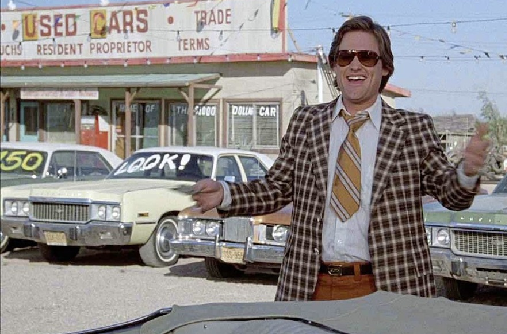


**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework
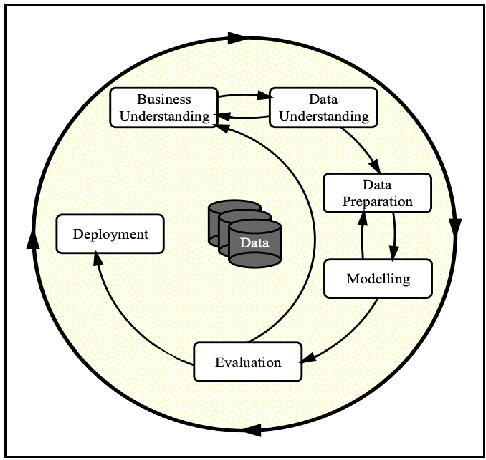

To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

##**Business Understanding**


The purpose of this project is to make use of available data on used cars in order to construct a model that can "articulate" how their selling price relates to  a variety of available features.
A valuable model should include features that have a logical and measurable effect on the price.
Such model can be used to predict resale prices for vehicles not included in the data set, making use of information on the features that the model determined to be relevant, and it can also provide insights useful to stakeholders (individuals in the business of buying and selling used cars) to make decisions about what type(s) of vehicles would constitute valuable assets in their business, and even which combination of features might be undesirable.




The following are some elements related to the business of used cars (vehicles in general):

###**I. VIN: unique identifier for vehicles**

Vehicles are identified uniquely through their VIN (Vehicle Identification Number), which contains basic information about it, such as the manufacturer, the year and the country of production, and some sort of sequential identifier that refers to one specific vehicle in the whole world.
 https://en.wikipedia.org/wiki/Vehicle_identification_number

###**II. Classic, antique and vintage cars**

 https://americancollectors.com/articles/vintage-vs-classic-vs-antique-cars/

- Classic car: manufactured 2000 or earlier (>20 years old)
- Antique car: manufactured 1975 or earlier *>45 years old). Either a "survivor" or restored in conformance to the original manufacturer specs.
- Vintage car: manufactured between 1919 and 1939. Either a "survivor" or restored in conformance to the original manufacturer specs.


###**III. How long does a car last?**

 According to https://www.progressive.com/answers/how-many-miles-does-a-car-last/, a conventional car can last 200,000 miles, though some well-maintained vehicles can reach 300,000 miles or more total.

##**IV. Some parameters on prices**

For the purposes of this project, it will be useful to have bounds on the variable "price". For starters, observations where the price is missing or equal to zero should be eliminated.
Furthermore, the assumption will be that the used vehicles under consideration are functional ones, so any observation with a nominal price below, say $1000 or that have been labeled as "salvage" condition will also be eliminated.

As for the other end of the spectrum for prices, it may be necessary to pay attention to the high prices.

####**Depreciation Facts**

It is well known that the value of a vehicle starts decreasing the moment its first owner drives it off the dealership/lot. This is known as depreciation; it is harshest during #the first year, when cars lose around 20% of their original price. After that, a new car will depreciate by 15% every year until it hits the five-year mark; by then, it will have lost about 60% of its value.
 (https://www.ramseysolutions.com/saving/car-depreciation)

 For reference, most vehicles lose about 60% of their value in the first five years, and by the time they are about 10.5 years old they will have lost practically all their value, according to https://www.omnicalculator.com/finance/car-depreciation.



###Task at Hand:

While the age of a car is an element that affects its price in a fundamental way, it is not the only determining factor in the price of a used vehicle; other contributors include the brand of car (manufacturer), the number of miles it has run (measured by the odometer), the type of vehicle it is (SUV, sedan, pickup truck, etc.) and the condition it is in.

The specific ways in which all these (and potentially other) factors interact to determine prices of used vehicles, so this is a great situation to apply a machine learning model.

In particular, it will be a good opportunity to explore linear regression, making use of both quantitative features and some important categorical ones as well.


## **Data Understanding**

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

####Initial tasks:
* Undertand the dimensions of the data set
* Understand the type of variables included in the set
* Figure out duplicates to eliminate them
* Investigate the presence of outliers
* Assess how problematic the set is in terms of missing values --analyze and decide which variables are strictly necessary;
* Decide how to handle the missing values for those (drop? impute?)

In [1]:
#only for Google colab:

#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Basic packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import image as mpimg

#Will import other necessary libraries/packages later, when needed

In [3]:
#df = pd.read_csv('/content/drive/My Drive/Berkeley/data/vehicles.csv')
df = pd.read_csv('vehicles.csv')

In [4]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


This initial glance at the top rows of the data set indicates that there are quite a few missing values.  
Further exploration:

In [5]:
df.shape

(426880, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

The set consists of 426,880 rows and 18 columns.  
There are indeed many missing values in the set -- at the right time, I will make a decision on how to handle this issue.  
From this information display, we can also see that the following are quantitative variables:
* id (just an identifier; really not useful for modeling purposes)
* price
* year
* odometer

And as categorical variables we have:
* region
* manufacturer
* model
* condition
* cylinders
* fuel
* title_status
* transmission
* VIN
* drive
* size
* type
* paint_color
* state




###Identification of duplicate VINs/missing VINs

In [7]:
df['VIN'].isnull().sum()

161042

In [8]:
df['VIN'].value_counts()

,count
VIN,
1FMJU1JT1HEA52352,261
3C6JR6DT3KG560649,235
1FTER1EH1LLA36301,231
5TFTX4CN3EX042751,227
1GCHTCE37G1186784,214
...,...
1GCEK19J78Z219711,1
JA4AT3AW1AZ006543,1
4T1BF28B61U153724,1


Initial focus: ensure there are no duplicates of the same vehicle appearing multiple times in the set.  
This is done examining the VINs, which act as unique identifier for all vehicles.  

We see that the total number of observations (data points/"samples") is 426,880.
 However, there are only 265,838 entries with VIN. The rest of the entries (161,042) do not have a VIN associated with them.

Will review for uniqueness of VINs; will need to check for duplicates among the
 161,042 rows that don't have a VIN.


###Identification of classic/antique/vintage vehicles

In [9]:
df.query("year <= 2000").shape
#These rows will be separated, as I will focus on "normal" (everyday type of ) vehicles.

(28822, 18)

###Identification of vehicles with too many miles and/or labeled as being in "salvage" condition

In [10]:
df.query(("odometer > 300000")).shape

(3032, 18)

In [11]:
df.query("condition == 'salvage'").shape

(601, 18)

###Exploration of the response variable "price"

In [12]:
df.price.describe()

,price
count,4.268800e+05
mean,7.519903e+04
std,1.218228e+07
min,0.000000e+00
25%,5.900000e+03
50%,1.395000e+04
75%,2.648575e+04
max,3.736929e+09


In [13]:
df.query("price==0").shape

(32895, 18)

There are 32,985 vehicles listed with a price of zero. These will be eliminated from the set.  
Furthermore, we see that the maximum price in the set is $3.74 billion!  
The top values will be explored in the data preparation section, to eliminate outliers that would affect the model.

###General identification of variables with a high proportion of missing values

In [14]:
df.isnull().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


Variables that may be problematic to work with include:
* odometer
* condition
* cylinders
* size
* manufacturer

Variables that likely have an effect on vehicles' prices with (fewer) missing values:
* year
* model


Other variables with a high proportion of missing values but that don't really affect the vehicles' prices: VIN, paint_color

## **Data Preparation**

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

### Guaranteeing uniqueness of samples

In [15]:
missing_vin = df[df['VIN'].isnull()]
missing_vin.shape

#These are the rows that have no VIN

(161042, 18)

In [16]:
#Check that every value other than ID, region and state are perfect matches --> will indicate duplication
#Eliminate those rows (only keep first instance, by default)

missing_vin_no_duplicates = missing_vin.drop_duplicates(subset=missing_vin.columns.difference(['id', 'region', 'state']))
missing_vin_no_duplicates.shape



(122126, 18)

In [17]:
# Now drop rows that have duplicate VINs.


vin_no_duplicates = df[df['VIN'].notna()] #start with the rows that do have a VIN entry
vin_no_duplicates = vin_no_duplicates.drop_duplicates(subset = ['VIN'])

vin_no_duplicates.shape

(118246, 18)

In [18]:
#Stack the two sets of rows that have no duplicates (118,246 of them have VINs, and 122,126 do not).
# The resulting set of 118246 + 122126 = 240372 observations has no duplicates anymore.
# This will be the set to proceed on.

noduplicates = pd.concat([missing_vin_no_duplicates, vin_no_duplicates])
noduplicates.shape

(240372, 18)

In [19]:
noduplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240372 entries, 0 to 426833
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            240372 non-null  int64  
 1   region        240372 non-null  object 
 2   price         240372 non-null  int64  
 3   year          239726 non-null  float64
 4   manufacturer  229710 non-null  object 
 5   model         236737 non-null  object 
 6   condition     145585 non-null  object 
 7   cylinders     154687 non-null  object 
 8   fuel          238669 non-null  object 
 9   odometer      237822 non-null  float64
 10  title_status  236668 non-null  object 
 11  transmission  239063 non-null  object 
 12  VIN           118246 non-null  object 
 13  drive         171631 non-null  object 
 14  size          85997 non-null   object 
 15  type          178352 non-null  object 
 16  paint_color   168192 non-null  object 
 17  state         240372 non-null  object 
dtypes: float6

There are no missing prices in this set with no duplicates (which is the variable/feature of interest).
Other features that have no missing values are: id (though it doesn't really help in the analysis); region, and state.
However, there are missing values for the other variables; some that may be of interest for modeling purposes
 are:  year, manufacturer, model, condition, cylinders, odometer,  type, and size.
Variables that may not really make sense in the model: title_status, transmission (?), VIN (just an identifier)
 drive (?), and paint_color.

###Eliminate rows with missing values in year and/or odometer (as these are the main potential quantitative regressors)

In [20]:
noduplicates = noduplicates.dropna(subset = ['year', 'odometer'])
noduplicates.shape

(237230, 18)

###Separate classic/antique/vintage vehicles (any row where year<=2000)

In [21]:
noduplicatesnooldies = noduplicates[noduplicates.year > 2000]
noduplicatesnooldies.shape

(212811, 18)

In [22]:
#Let's have a look at the quantitative variables (with particular attention to the price) in this reduced set

noduplicatesnooldies.describe()

,id,price,year,odometer
count,2.128110e+05,2.128110e+05,212811.000000,2.128110e+05
mean,7.312244e+09,6.005459e+04,2012.023359,1.070831e+05
std,4.198315e+06,1.102017e+07,5.058094,1.645571e+05
min,7.301583e+09,0.000000e+00,2001.000000,0.000000e+00
25%,7.309572e+09,5.000000e+03,2008.000000,5.248100e+04
50%,7.313740e+09,1.078800e+04,2013.000000,9.965900e+04
75%,7.315626e+09,1.999500e+04,2016.000000,1.440000e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


###Eliminate outliers in mileage recorded by odometer and/or vehicles in "salvage" condition.  
Reasonable used vehicles for sale ought to have some life left in them. We will eliminate all rows with 300,000 miles or more in the odometer, and also those that state their condition as "salvage".

In [23]:
noduplicatesnooldiesnosalvage = noduplicatesnooldies[(noduplicatesnooldies.odometer < 300000) & (noduplicatesnooldies.condition != "salvage")]
noduplicatesnooldiesnosalvage.shape

(210784, 18)

In [24]:
#investigate prices variable:
#count how many zeros and how many vehicles report a price over $300,000

print('There are ', noduplicatesnooldiesnosalvage[noduplicatesnooldiesnosalvage.price == 0].shape[0], ' rows with a price of $0')
print('There are ', noduplicatesnooldiesnosalvage[noduplicatesnooldiesnosalvage.price <1000].shape[0], ' rows with a price under $1,000 (including the zeros)')
print('There are ', noduplicatesnooldiesnosalvage[noduplicatesnooldiesnosalvage.price > 300000].shape[0], ' rows with a price over $300K')


There are  14770  rows with a price of $0
There are  21020  rows with a price under $1,000 (including the zeros)
There are  30  rows with a price over $300K


### Variable price: cleaning up inaccurate values, suspicious values, and outliers
* Eliminate rows that have a price of \$0: these are clearly inaccurate and would be problematic for modeling purposes.
* Eliminate rows that have a price of $1000 or less: f there are any rows left with such low price, they could represent inaccuracies or vehicles that are not really functional any more ('salvage', perhaps not clearly labeled as such in the set).
* Eliminate rows with prices over \$300,000: these seem unreasonable (or at the very least outliers), even for luxury vehicles, considering the information included in the business understanding that refers to depreciation.
    

  The resulting subset will likely be the set that we can work with, so I will use a manageable name for it: **vehicles**

Prices of $300,000 or higher are not really representative of the used-car market. They may be ultra-luxury cars, rare cars, collectors' cars, etc. The reported price could also be an error or a code for interested buyers to contact the seller. In any case, I will eliminate them

For reference, the Lamborghini Temerario is priced at \$360K. Remember after 1 year it's worth #20\% less ~ \$288K. So \$300K seems to be a reasonable cutoff value to eliminate those ultra-luxury vehicles or clear errors in the set.

In [25]:
vehicles = noduplicatesnooldiesnosalvage[(noduplicatesnooldiesnosalvage.price >= 1000) & (noduplicatesnooldiesnosalvage.price <= 300000)]
vehicles.shape
#Check: 210,784 - (21,020 + 30) = 189,734

(189734, 18)

To lighten the load, now that we have guaranteed that all rows correspond to distinct vehicles, we can drop the columns 'id' and 'VIN' as they do not affect the analysis.

In [26]:
vehicles = vehicles.drop(['id', 'VIN'], axis = 1)
vehicles.shape

(189734, 16)

In [27]:
# missing values in each column:
vehicles.isnull().sum()

,0
region,0
price,0
year,0
manufacturer,5498
model,1806
condition,73112
cylinders,66344
fuel,1174
odometer,0
title_status,2572


In [ ]:
#Relevant variables (in terms of effects on price) with lots of missing values:
#condition (73,112 missing values)
#cylinders (66,344 missing values)
#type (46,216 mv)
#manufacturer (5,498 mv)

In [28]:
# Drop the rows missing manufacturer information
vehicles = vehicles.dropna(subset=['manufacturer'])
vehicles.shape

(184236, 16)

In [29]:
#Overall check
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184236 entries, 31 to 426746
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        184236 non-null  object 
 1   price         184236 non-null  int64  
 2   year          184236 non-null  float64
 3   manufacturer  184236 non-null  object 
 4   model         182430 non-null  object 
 5   condition     112736 non-null  object 
 6   cylinders     119916 non-null  object 
 7   fuel          183105 non-null  object 
 8   odometer      184236 non-null  float64
 9   title_status  181700 non-null  object 
 10  transmission  183496 non-null  object 
 11  drive         134383 non-null  object 
 12  size          66711 non-null   object 
 13  type          140011 non-null  object 
 14  paint_color   133915 non-null  object 
 15  state         184236 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 23.9+ MB


In [30]:
#Investigate number of different labels in  "manufacturer", "model", and "type".
print("The variable manufacturer has ",vehicles.manufacturer.nunique(), " unique values")
print("The variable model has ",vehicles.model.nunique(), " unique values")
print("The variable type has ",vehicles.type.nunique(), " unique values")

The variable manufacturer has  41  unique values
The variable model has  18593  unique values
The variable type has  13  unique values


The feature 'manufacturer' can be further categorized by luxury levels ([The Top Luxury Car Brands of the World])(https://autotribute.com/luxury-car-brands/).

The number of different models seems excessive, and it is doubtful that such granularity can provide useful quantification in terms of its effect on the vehicles' prices -- this column can be dropped.


The feature 'type' seems pretty manageable, but there are 44,225 missing values for it! We will start the analysis without taking it into account; at a later point we can focus only on the samples that do have information on the type of vehicle.

In [31]:
vehicles = vehicles.drop(['model'], axis = 1)
vehicles.shape

(184236, 15)

In [32]:
#Categorize manufacturers by luxury level

luxlevel = {'ultraluxury': ['aston-martin', 'ferrari' ],
            'luxury': ['mercedes-benz', 'bmw', 'audi', 'porsche', 'alfa-romeo', 'jaguar', 'land rover', 'tesla', 'cadillac', 'volvo', \
                       'mini', 'rover', 'morgan'],
            'affordableluxury': ['lincoln', 'buick', 'acura', 'infiniti', 'lexus'],
            'nonluxury': ['ford', 'chevrolet', 'jeep', 'gmc', 'ram', 'dodge', 'chrysler', 'pontiac', 'mercury', 'saturn', 'fiat',\
                          'volkswagen', 'toyota', 'honda', 'nissan','hyundai', 'subaru', 'kia', 'mazda', 'mitsubishi', 'datsun'],
                'harley motorcycle': ['harley-davidson'],
            'unknown': ['other']}
#print(luxlevel)
#function to find the dictionary key for a given value
def find_key(value):
    for key, values in luxlevel.items():
        if value in values:
            return key
    return None

vehicles['lux'] = vehicles['manufacturer'].apply(find_key)
vehicles['lux'].value_counts()


,count
lux,
nonluxury,149728
luxury,22726
affordableluxury,11660
harley motorcycle,80
ultraluxury,42


In [33]:
vehicles.shape

(184236, 16)

##Some visual inspection of the variables we have to work with

[Text(0.5, 1.0, 'Figure 1: Recorded miles (odometer) vs Price of used vehicles, color-coded by year')]

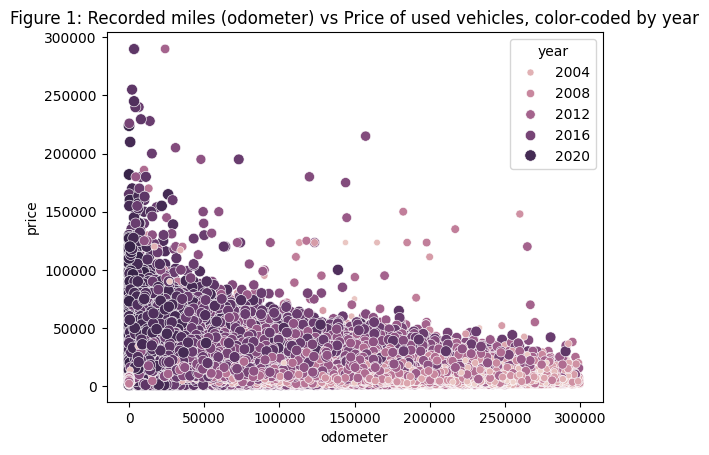

In [ ]:
# Quick visual exploration of remaining information, paying particular attention to the relationship
# between mileage ("odometer" reading), the year of the vehicle, and the price.

sns.scatterplot(x='odometer', y='price', hue = 'year', size = 'year', data = vehicles).set(title = 'Figure 1: Recorded miles (odometer)\
 vs Price of used vehicles, color-coded by year')


What this plot shows is totally expected: vehicles with lower odometer readings tend to also be newer (darker and larger circles as markers), whereas older vehicles (lighter pink/smaller circles) tend to have higher odometer readings, and they also appear to be more commonly associated with lower prices.  
The purpose of modeling will be to further ascertain how these features come together to provide approximated descriptions of the dynamics that governs used-vehicle prices.

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000')])

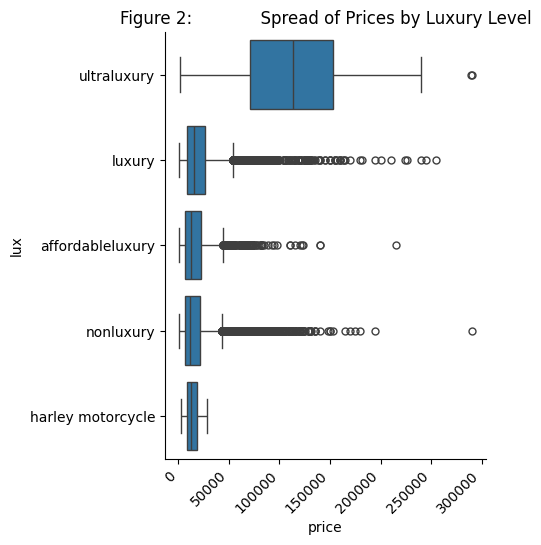

In [ ]:
sns.catplot(vehicles, x = 'price', y = 'lux', kind = 'box', \
            order = ['ultraluxury', 'luxury', 'affordableluxury', 'nonluxury', 'harley motorcycle']).set(title = 'Figure 2: \
            Spread of Prices by Luxury Level')
plt.xticks(rotation = 45, ha = 'right')

These boxplots show that the categorization by luxury level makes sense as there are noticeable differences in the distribution of the prices for each group.

[Text(0.5, 1.0, 'Figure 3: Recorded miles (odometer) vs Price of used vehicles, color-coded by luxury level and size-coded by year')]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


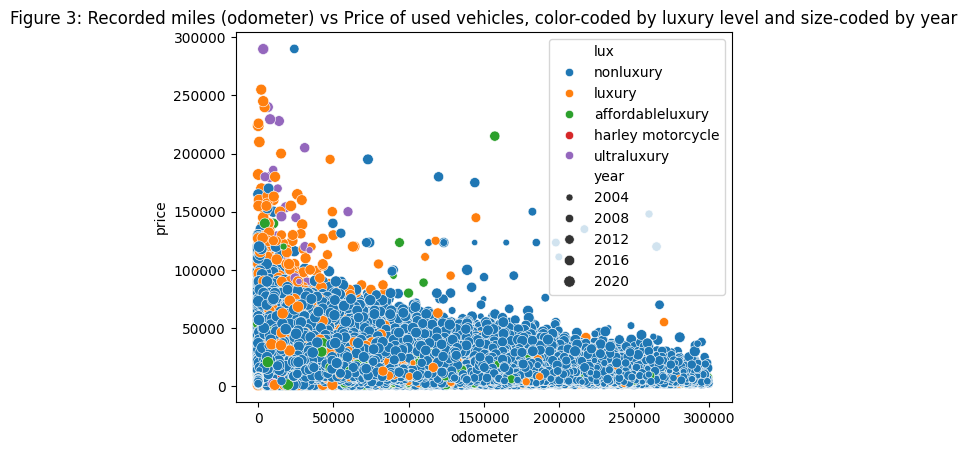

In [ ]:
#
sns.scatterplot(x='odometer', y='price', hue = 'lux', size = 'year', data = vehicles).set(title = 'Figure 3: \
Recorded miles (odometer) vs Price of used vehicles, color-coded by luxury level and size-coded by year')

Figure 3 shows some nice clustering of colors, with nonluxury vehicles (blue dots) associated with lower prices, luxury vehicles (orange dots) with higher prices, and ultraluxury (purple dots) showing up higher (and more to the left) in the graph. It is hard to see the motorcycles, as they are likely buried by the blue, nonluxury dots.  
It looks like making use of this 'lux' feature may be useful in the modeling stage.

Text(0.5, 0.98, 'Figure 4: Recorded miles (odometer) vs Price of used vehicles, color-coded by year, separate plots for each luxury level')

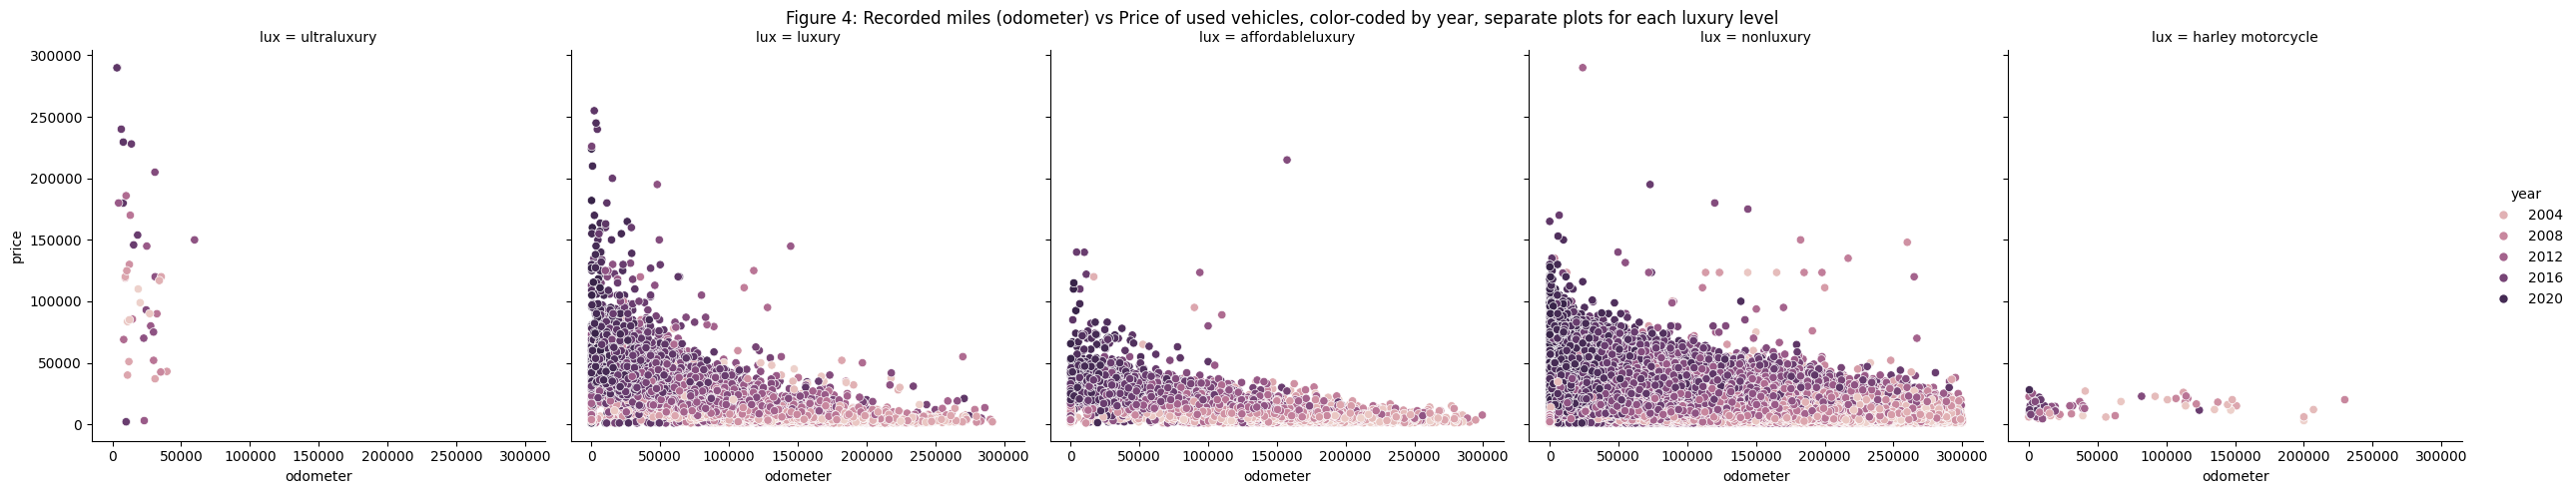

In [ ]:
rp = sns.relplot(
    data = vehicles, x = 'odometer', y = 'price',
    col = 'lux',  col_order = ['ultraluxury', 'luxury', 'affordableluxury', 'nonluxury', 'harley motorcycle'],
    hue = 'year', kind = 'scatter')
rp.fig.subplots_adjust(top = 0.9)
rp.fig.suptitle('Figure 4: \
Recorded miles (odometer) vs Price of used vehicles, color-coded by year, separate plots for each luxury level')

(Figure 4) This is another visualization that helps solidify the idea that prices depend to an extent on this 'luxury level'.  
Darker dots signal newer vehicles, which tend to appear at the left (lower mileage recorded in the odometer) and at higher levels (higher prices) in the graphs.  
This breakdown also allows us to understand the breakdown of the samples into the different luxury categories (with most data in the "nonluxury" category, followed by "luxury", "affordable luxury", motorcycles, and then "ultraluxury").

In [35]:
vehicles['lux'].value_counts().sort_values(ascending = False)

,count
lux,
nonluxury,149728
luxury,22726
affordableluxury,11660
harley motorcycle,80
ultraluxury,42


Though the variable 'type' has many missing values, it may also be interesting to explore whether we can visualize any effect.

[Text(0.5, 1.0, 'Figure 5: Recorded miles (odometer) vs Price of used vehicles, color-coded by type')]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


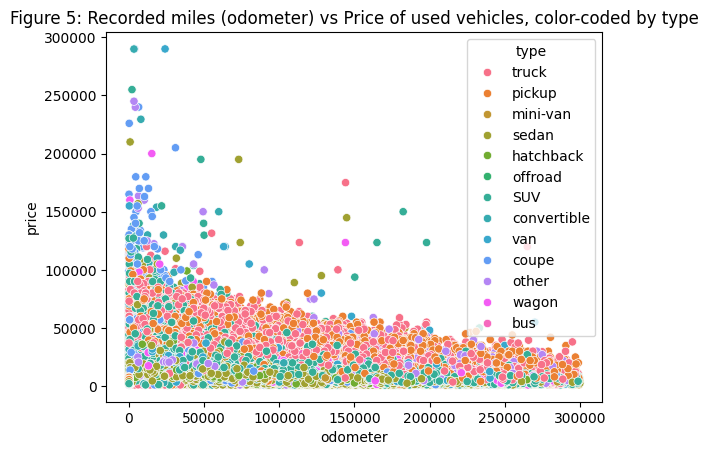

In [36]:
#Visualizing data by "type"

sns.scatterplot(x='odometer', y='price', hue = 'type', legend = "brief", data = vehicles).set(title = 'Figure 5: \
Recorded miles (odometer) vs Price of used vehicles, color-coded by type')

Figure 5 also shows clustering of colors, suggesting that sedans tend to fetch lower prices, followed by SUVs, trucks/pickups, and then coupe models, which also tend to be newer vehicles, conveyed by the fact that those lilac dots have lower readings in the odometer.  
Not necessarily surprising information, but interesting enough.

One other visualization that may be of interest is simply by manufacturer, to understand the breakdown of vehicle makers in the set.

[Text(0.5, 1.0, 'Figure 6: Number of observations in vehicles set')]

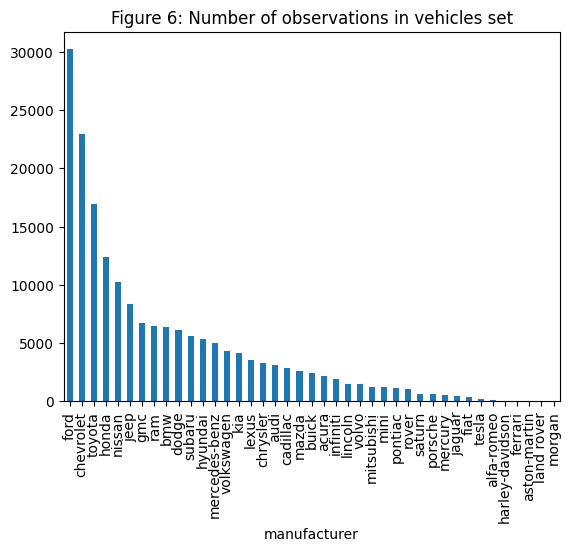

In [ ]:
vehicles.manufacturer.value_counts().plot.bar().set(title = 'Figure 6: Number of observations in vehicles set')


Clearly, the winner is Ford, with about 30,000 vehicles in the set, followed by Chevrolet and then Toyota.

While it is interesting to observe the Pareto chart in Figure 6, as mentioned earlier, there are too many labels in this feature to make it useful for differentiation of prices. (Also, in true Pareto fashion, just a few of the labels take up most of the data, so we would be left with many manufacturer labels that have insufficient observations to be useful.)

The categorizing of manufacturers by luxury level will be used instead.

In [ ]:
#Quick comparison of prices by luxury levels

vehicles.groupby('lux').agg({'price': ['min', 'median', 'mean', 'max', 'std']})

price                                               
                    min    median           mean     max           std
lux                                                                   
affordableluxury   1000   12800.0   15733.442796  215000  11555.640668
harley motorcycle  3000   12000.0   13500.975000   27995   5920.869251
luxury             1000   15000.0   19514.360028  255000  16075.254221
nonluxury          1000   11988.0   15799.983063  290000  13194.142471
ultraluxury        1947  113449.5  117755.904762  289995  71915.766885

This artificial variable 'lux' will be used as One Hot Encoder (or dummy variable) in a regression model, so we can investigate what the data suggest is the differential in prices for each of the categories.

Before moving on the the modeling phase, let's explore the three quantitative variables of main interest through a pairplot:

Text(0.5, 1.05, 'Figure 7: Pairwise scatterplots: odometer, year, price')

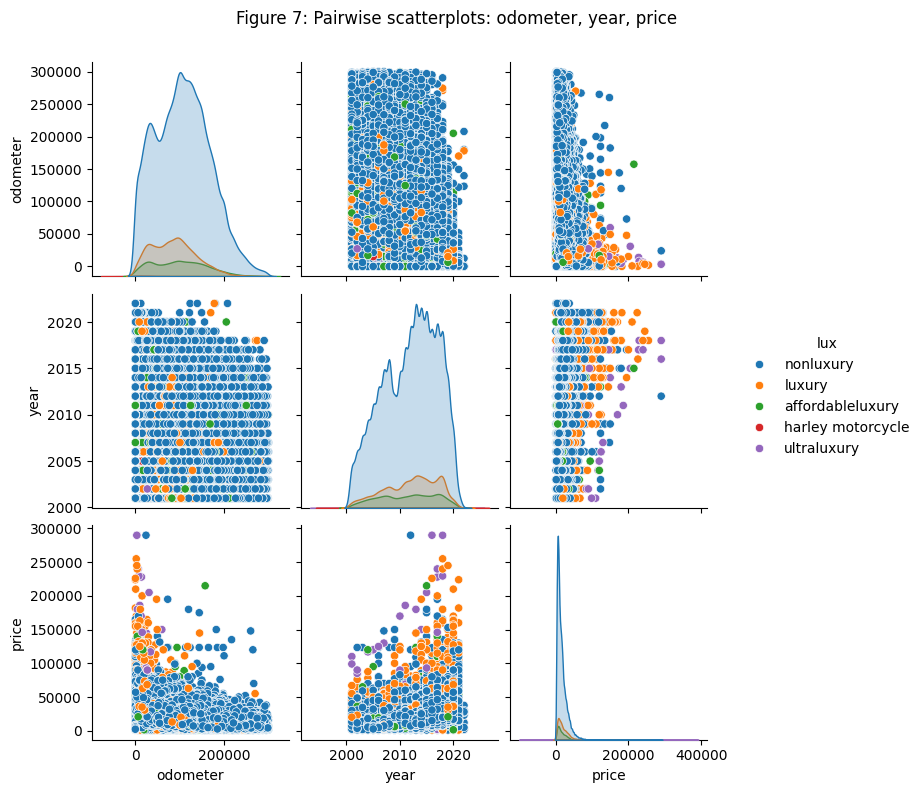

In [ ]:
sns.pairplot(vars = ['odometer', 'year', 'price'], data = vehicles, hue= 'lux').fig.suptitle('Figure 7: \
Pairwise scatterplots: odometer, year, price', y=1.05)

From the graph above we can see, in the diagonal, the overall density distribution of each of the quantitative variables
 The response variable of interest (price), at the bottom right corner, is clearly skewed right. During the modeling phase, it could be necessary to use a normalizing transformation such as natural logarithm.

The clustering of colors, especially in the last row of graphs,  once again suggests that the luxury level of the vehicle could be useful in the modeling phase.


## Feature engineering and transformations in the preparation of the data set

### Use the 'year' variable to find the age of the vehicle
The quantitative variables to use in the modeling phase as regressors are 'odometer' and 'year'.

Since 'year' is informative of the age of the car (and that depends on when an analysis like this one is carried out), it may be better for interpretation purposes to work with the age of the vehicle, defined as *age = 2024 - year*.

The variable 'odometer' will be kept as is.

### Deal with the skewness of the response variable ('price')
The response variable of interest is 'price'. As shown above, this variable is skewed right, so we can apply a logarithmic transformation.

In [ ]:
#Create 'age' variable; eliminate the 'year' column from the set
vehicles['age'] = 2024 - vehicles['year']
vehicles = vehicles.drop(['year'], axis = 1)
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184236 entries, 31 to 426746
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        184236 non-null  object 
 1   price         184236 non-null  int64  
 2   manufacturer  184236 non-null  object 
 3   condition     112736 non-null  object 
 4   cylinders     119916 non-null  object 
 5   fuel          183105 non-null  object 
 6   odometer      184236 non-null  float64
 7   title_status  181700 non-null  object 
 8   transmission  183496 non-null  object 
 9   drive         134383 non-null  object 
 10  size          66711 non-null   object 
 11  type          140011 non-null  object 
 12  paint_color   133915 non-null  object 
 13  state         184236 non-null  object 
 14  lux           184236 non-null  object 
 15  age           184236 non-null  float64
dtypes: float64(2), int64(1), object(13)
memory usage: 27.9+ MB


Text(0.5, 1.0, 'natural log of price')

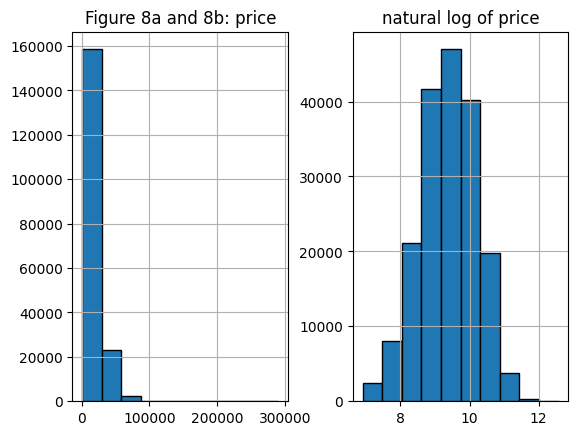

In [ ]:
#Transform the price through natural log: create 'ln_price'

vehicles['ln_price'] = np.log(vehicles['price'])

fig, axes = plt.subplots(1,2)

vehicles.hist('price', ax=axes[0], edgecolor = 'black')
axes[0].set_title('Figure 8a and 8b: price')

vehicles.hist('ln_price', ax=axes[1], edgecolor = 'black')
axes[1].set_title('natural log of price')

Figures 8a and 8b show the effect of the logarithmic transformation of the prices: the skewness is eliminated and the observations are 'normalized'.

In [ ]:
#Explore linear correlations
explorecorr = vehicles[['ln_price', 'age', 'odometer']].corr()
explorecorr

,ln_price,age,odometer
ln_price,1.000000,-0.691319,-0.583136
age,-0.691319,1.000000,0.650477
odometer,-0.583136,0.650477,1.000000


## **Modeling**

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Start with a simple linear regression model using only age of vehicle.

**Model 1a: Simple linear regression of age vs ln(price)**

In [ ]:
#model 1.a : SLR age vs ln(price)

X_a=vehicles[['age']]
lny=vehicles['ln_price']

Xa_train, Xa_test, lny_train, lny_test = train_test_split(X_a, lny, test_size=0.3, random_state=42)

#Instantiate, fit, and predict:
model_1a = LinearRegression()
model_1a.fit(Xa_train, lny_train)
y_pred_1a = model_1a.predict(Xa_test)

# Evaluate the model
mse_1a = mean_squared_error(lny_test, y_pred_1a)
print(f"Mean Squared Error: {mse_1a}")
print("train MSE: ", mean_squared_error(lny_train, model_1a.predict(Xa_train)))

# Print the coefficients and intercept
print(f"Coefficients: {model_1a.coef_}")
print(f"Intercept: {model_1a.intercept_}")

r_squared_1a = model_1a.score(Xa_test, lny_test)
print("R-squared: ",r_squared_1a)


Mean Squared Error: 0.3508603098605466
train MSE:  0.35020805968175106
Coefficients: [-0.11289395]
Intercept: 10.756072010191312
R-squared:  0.47733989458284976


In [ ]:
#Resulting coefficients to output

results1a_df = pd.DataFrame(zip(model_1a.feature_names_in_, model_1a.coef_))

print(results1a_df)
print(" ")
print("intercept: ", model_1a.intercept_)

     0         1
0  age -0.112894
 
intercept:  10.756072010191312


In this first model, the fit using the training set is given by  
$\ln(\textrm{price}) = 10.756072 - 0.11289395 \times$  age, or  
$\textrm{price} = e^{10.756072}e^{ -0.11289395\times age} $, which is to say that the model predicts that a brand new vehicle (0 miles in the odometer and 0 years old) would sell for $e^{10.756072} \approx \$46,914$, and that this price would reduce by a factor of  $e^{-0.11289395} \approx 0.89325$ for every  year of age of the vehicle.  

For example, a 12-year old vehicle would see a "predicted price" of $\$46,914\times (0.89325)^{12}  \approx \$12,104.60 $


The value of $R^2$ for this model is 0.47734, which is an indication of the proportion of the variability in the prices is being captured by the model. Notice that in the case of a Simple Linear Regression like this one, $R^2$ is the square of the coefficient of linear correlation. Earlier, the linear correlation coefficient between ln(price) and age as -0.691319, which squared up equals 0.47792196. The minor discrepancy seen between this value and the calculated $R^2$ has to do with the fact that the latter is calculated only with the test set, whereas the former made use of the whole set.

**The test MSE is 0.3508603098605466 and train MSE is 0.35020805968175106**

Could the variable 'odometer' do better by itself?  
**Model 1.aa Simple linear regression of odometer vs ln(price)**

In [ ]:
#model 1.aa : SLR odometer vs ln(price)

X_aa=vehicles[['odometer']]
lny=vehicles['ln_price']

Xaa_train, Xaa_test, lny_train, lny_test = train_test_split(X_aa, lny, test_size=0.3, random_state=42)

#Instantiate, fit, and predict:
model_1aa = LinearRegression()
model_1aa.fit(Xaa_train, lny_train)
y_pred_1aa = model_1aa.predict(Xaa_test)

# Evaluate the model
mse_1aa = mean_squared_error(lny_test, y_pred_1aa)
print(f"Mean Squared Error: {mse_1aa}")
print("train MSE: ", mean_squared_error(lny_train, model_1aa.predict(Xaa_train)))

# Print the coefficients and intercept
print(f"Coefficients: {model_1aa.coef_}")
print(f"Intercept: {model_1aa.intercept_}")

r_squared_1aa = model_1aa.score(Xaa_test, lny_test)
print("R-squared: ",r_squared_1aa)


Mean Squared Error: 0.4416013833215073
train MSE:  0.44351545660067127
Coefficients: [-7.9443287e-06]
Intercept: 10.20839324526198
R-squared:  0.3421671842822136


In [ ]:
results1aa_df = pd.DataFrame(zip(model_1aa.feature_names_in_, model_1aa.coef_))

print(results1aa_df)
print(" ")
print("intercept: ", model_1aa.intercept_)

          0         1
0  odometer -0.000008
 
intercept:  10.20839324526198


The results are not vastly different, though this model seems inferior to the previous one, as it produces higher values of the MSE (both for the test and the training set) and a lower $R^2$ --which is explained by the fact that the linear correlation coefficient between ln(price) and odometer is -0.583136, lower than the linear correlation coefficient between ln(price) and age.

The fitted model is now given by  
$\ln(\textrm{price}) = 10.208393 - 0.00000794433 \times$  odometer, or  
$\textrm{price} = e^{10.208393}e^{ -0.00000794433\times age} $, which is to say that the model predicts that a brand new vehicle (0 miles in the odometer and 0 years old) would sell for $e^{10.208393} \approx \$27,129.93$, and that this price would reduce by a factor of  $e^{-0.00000794433} \approx 0.9999920557$ for every  additional mile in the odometer.  

For example, a vehicle with 100,000 miles in the odometer would get a "predicted price" of $\$27,129.93\times (0..9999920557)^{100000}  \approx \$12,258.32 $


The value of $R^2$ for this model is 0.47734, representing the proportion of the variability in the prices is being captured by the model.

**The test MSE is 0.4416013833215073 and train MSE is 0.44351545660067127**

\\
Move on to a linear regression model that has odometer and age as explanatory variables for the price.

**Model 1.b Multiple linear regression of odometer and age vs ln(price)**

In [ ]:
# model 1.b: MLR odometer and age vs ln(price)
X_b=vehicles[['odometer', 'age']]
lny=vehicles['ln_price']

Xb_train, Xb_test, lny_train, lny_test = train_test_split(X_b, lny, test_size=0.3, random_state=42)

#Instantiate, fit, and predict:
model_1b = LinearRegression()
model_1b.fit(Xb_train, lny_train)
y_pred_1b = model_1b.predict(Xb_test)

# Evaluate the model
mse_1b = mean_squared_error(lny_test, y_pred_1b)
print(f"Mean Squared Error: {mse_1b}")
print("train MSE: ", mean_squared_error(lny_train, model_1b.predict(Xb_train)))

# Print the coefficients and intercept
print(f"Coefficients: {model_1b.coef_}")
print(f"Intercept: {model_1b.intercept_}")

r_squared_1b = model_1b.score(Xb_test, lny_test)
adjusted_r_squared_1b = 1 - (1-r_squared_1b)*(len(lny_test)-1)/(len(lny_test)-Xb_test.shape[1]-1)

print("R-squared: ",r_squared_1b)
print("Adjusted R-squared: ", adjusted_r_squared_1b)

Mean Squared Error: 0.32986158583507325
train MSE:  0.329608607119591
Coefficients: [-3.14333530e-06 -8.84600202e-02]
Intercept: 10.785154593492333
R-squared:  0.5086207063598835
Adjusted R-squared:  0.5086029246672716


In [ ]:
results1b_df = pd.DataFrame(zip(model_1b.feature_names_in_, model_1b.coef_))

print(results1b_df)
print(" ")
print("intercept: ", model_1b.intercept_)

          0         1
0  odometer -0.000003
1       age -0.088460
 
intercept:  10.785154593492333


In this multiple linear regression model, the fit using the training set is given by  
$\ln(\textrm{price}) = 10.7851545 - 0.000003143335 \times$ odometer $- 0.08846 \times$ age, or  
$\textrm{price} = e^{10.7851545}e^{-0.000003143335 \times odometer - 0.08846 \times age} $, which is to say that the model predicts that a brand new vehicle (0 miles in the odometer and 0 years old) would sell for $e^{10.7851545} = \$48,298.44$, and that this price would reduce by a factor of  $e^{-0.000003143335} \approx 0.999997$ for every mile in the odometer, and by a factor of $e^{-0.08846} \approx 0.91534$ for every year of age of the vehicle.  

For example, a car with 50,000 miles in the odometer and 4 years old would see a "predicted price" of $\$48,298.44\times (0.999997)^50,000\times (0.91534)^4  \approx \$28,973.81 $


Since the model includes more than one predictor, now we should look at the adjusted $R^2$ value (which imposes a penalty that increases with the number of regressors)--  for this model the adjusted $R^2$ is  0.508603, which is an indication of how much of the variability in the prices is being captured by the model.

**The test MSE is 0.32986158583507325 and train MSE is 0.329608607119591**

A natural modification to this initial model would be to include polynomial features; we'll start with degree = 2, which means that the new model will include the two linear terms for odometer and age, two quadratic terms (one for each of those two features), plus an interaction term.


**Model 2.b Polynomial regression degree 2 with odometer and age vs ln(price)**

In [ ]:
#model_2b: Polynomial regression degree 2 with odometer and age as regressors for ln(price)

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(Xb_train)
X_test_poly = poly.transform(Xb_test)

model_2b = LinearRegression()
model_2b.fit(X_train_poly, lny_train)
y_pred_2b = model_2b.predict(X_test_poly)


mse_2b = mean_squared_error(lny_test, y_pred_2b)
print(f"Mean Squared Error: {mse_2b}")
print("train MSE: ", mean_squared_error(lny_train, model_2b.predict(X_train_poly)))

# Print the coefficients and intercept
print(f"Coefficients: {model_2b.coef_}")
print(f"Intercept: {model_2b.intercept_}")

r_squared_2b = model_2b.score(X_test_poly, lny_test)
#print("R-squared: ",r_squared_2b)
adjusted_r_squared_2b = 1 - (1-r_squared_2b)*(len(lny_test)-1)/(len(lny_test)-X_test_poly.shape[1]-1)

print("R-squared: ",r_squared_2b)
print("Adjusted R-squared: ", adjusted_r_squared_2b)

Mean Squared Error: 0.32580623793067226
train MSE:  0.32568494728795694
Coefficients: [-2.67429616e-06 -1.51114914e-01  7.63011876e-12 -1.38313228e-07
  2.84376511e-03]
Intercept: 11.098120592236045
R-squared:  0.5146617674421698
Adjusted R-squared:  0.5146178573514653



This model produces the following fit:

$\ln$(price) = $11.0981206 -0.00000267423\times\textrm{odometer} -0.151115\times\textrm{age} + 0.00000000000763012\times\textrm{odometer}^2 - 0.0000001383132\times\textrm{odometer}\times\textrm{age} +0.00284376511\times\textrm{age}^2$.

This is now even more complicated to interpret (a price to pay for the added complexity). This model predicts a price of \$32,756.58 for 4-year old vehicle with 50,000 miles in the odometer.


The value of the adjusted $R^2$ (which includes a penalty for using more regressors) is  0.5146178, and the **test MSE = 0.32580623793067226 and the train MSE is 0.32568494728795694**

In [ ]:
#Calculate predicted price for a 4-year old vehicle with 50,000 miles in the odometer
import math
math.exp(model_2b.predict(poly.fit_transform([[50000, 4]])))

32756.576263345836

As exploration, we can increase the degree of the polynomial features to 3:

**Model 2.c: Polynomial regression degree 3 with odometer and age vs ln(price)**

In [ ]:
##Polynomial degree 3

#model_2c: Polynomial regression degree 3 with odometer and age as regressors for ln(price)

poly3 = PolynomialFeatures(degree = 3, include_bias = False)
X_train_poly3 = poly3.fit_transform(Xb_train)
X_test_poly3 = poly3.transform(Xb_test)

model_2c = LinearRegression()
model_2c.fit(X_train_poly3, lny_train)
y_pred_2c = model_2c.predict(X_test_poly3)


mse_2c = mean_squared_error(lny_test, y_pred_2c)
print(f"Mean Squared Error: {mse_2c}")
print("train MSE: ", mean_squared_error(lny_train, model_2c.predict(X_train_poly3)))

# Print the coefficients and intercept
print(f"Coefficients: {model_2c.coef_}")
print(f"Intercept: {model_2c.intercept_}")

r_squared_2c = model_2c.score(X_test_poly3, lny_test)
#print("R-squared: ",r_squared_2c)


adjusted_r_squared_2c = 1 - (1-r_squared_2c)*(len(lny_test)-1)/(len(lny_test)-X_test_poly3.shape[1]-1)

print("R-squared: ",r_squared_2c)
print("Adjusted R-squared: ", adjusted_r_squared_2c)

Mean Squared Error: 0.32317843061814255
train MSE:  0.32265975464677993
Coefficients: [-2.74657562e-06 -9.22498707e-04 -3.38403900e-11  3.81838223e-07
 -1.07950241e-02  1.88542758e-16 -2.01146847e-12 -4.32098434e-10
  3.28581851e-04]
Intercept: 10.583470379815932
R-squared:  0.5185762884306755
Adjusted R-squared:  0.5184978820789243


Interpretability is by now a lost cause, though we can calculate that this model predicts a price of \$29,308.55 for a 4-year old vehicle with 50,000 miles in the odometer.  

This model is a little extreme (third degree does not make particular conceptual sense), though in terms of ML, it produces a marginally better result, with a slightly higher value for the adjusted $R^2$ (now at $\approx$ 0.5185). The MSE is also marginally lower than for the previous models: **test MSE  is 0.32317843061814255 and train MSE is 0.32265975464677993.**

However, it is likely that we have ventured into overfitting territory here.

In [ ]:
#Predict price for a 4-year-old vehicle with 50,000 miles in the odometer
import math
math.exp(model_2c.predict(poly3.fit_transform([[50000, 4]])))

29308.55138273071

What about going back to the first-degree model, but incorporate the artificial variable 'lux' as OneHotEncoder, to investigate the effect of this feature...?


**Model 3.c Multiple linear regression with odometer, age, and dummy variables for lux vs ln(price)**

In [ ]:
#model 3.c: MLR with odometer, age and dummy variables for lux vs ln(price)

from sklearn.preprocessing import OneHotEncoder

X_c=vehicles[['odometer', 'age', 'lux']]
lny=vehicles['ln_price']

encoder = OneHotEncoder( sparse_output = False, handle_unknown = 'ignore')
encoded_features = encoder.fit_transform(X_c[['lux']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['lux']))

X_c = pd.concat([X_c.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

#Drop original 'lux'
X_c = X_c.drop(columns=['lux'])

Xc_train, Xc_test, lny_train, lny_test = train_test_split(X_c, lny, test_size=0.3, random_state=42)

#Instantiate, fit, and predict:
model_3c = LinearRegression()
model_3c.fit(Xc_train, lny_train)
y_pred_3c = model_3c.predict(Xc_test)

# Evaluate the model
mse_3c = mean_squared_error(lny_test, y_pred_3c)
print(f"Mean Squared Error: {mse_3c}")
print("train MSE: ", mean_squared_error(lny_train, model_3c.predict(Xc_train)))

# Print the coefficients and intercept
print(f"Coefficients: {model_3c.coef_}")
print(f"Intercept: {model_3c.intercept_}")

r_squared_3c = model_3c.score(Xc_test, lny_test)
adjusted_r_squared_3c = 1 - (1-r_squared_3c)*(len(lny_test)-1)/(len(lny_test)-Xc_test.shape[1]-1)


print("R-squared: ",r_squared_3c)
print("Adjusted R-squared: ", adjusted_r_squared_3c)

Mean Squared Error: 0.32646244388673656
train MSE:  0.3258359488549039
Coefficients: [-2.94795854e-06 -9.00112671e-02 -3.33762880e-01 -5.24786341e-01
 -2.48243639e-01 -4.09981934e-01  1.51677479e+00]
Intercept: 11.168581629485509
R-squared:  0.5136842482855908
Adjusted R-squared:  0.5136226481143731


In [ ]:
#Check structure of features used in this model
X_c.sample()

,odometer,age,lux_affordableluxury,lux_harley motorcycle,lux_luxury,lux_nonluxury,lux_ultraluxury
182008,91608.0,13.0,0.0,0.0,1.0,0.0,0.0


This model predicts the natural log of the prices using linear terms for odometer and age, plus "dummy sparks" that light up depending on the luxury level of the vehicle (affordableluxury, harley motorcycle, luxury, nonluxury, or ultraluxury, in this specific order).

$\ln$(price) = $11.16858163 - 0.00000294796\times$ odometer $-0.09001127\times$ age $-0.337629\times$lux_affordableluxury $-0.5247863\times$lux_harley $-0.248244\times$lux_luxury $-0.409982\times$lux_nonluxury $+ 1.516775\times$lux_ultraluxury.

For instance, this model predicts a price of  \\$41,931.60  for a brand new (odometer = 0, age = 0) Harley-Davidson motorcycle; \\$47,032.80  for a brand new nonluxury car, and \$11,857.60  for a nonluxury car that is 12 years old and has 101,000 miles in the odometer.

In [ ]:
#Some predictions for this model
import math
print ("price for new Harley-Davidson: $", math.exp(model_3c.predict([[0,0,0,1,0,0,0]])))
print ("price for new nonluxury car: $", math.exp(model_3c.predict([[0,0,0,0,0,1,0]])))
print ("price for 12-yo nonluxury car with 101,000 miles in odometer: $", math.exp(model_3c.predict([[101000,12,0,0,0,1,0]])))

price for new Harley-Davidson: $ 41931.61217756816
price for new nonluxury car: $ 47032.76169696112
price for 12-yo nonluxury car with 101,000 miles in odometer: $ 11857.557142495065


In this model, the **test MSE is 0.32646244388673656; the train MSE is 0.3258359488549039**, and an adjusted $R^2 = 0.513622$.

As a reminder, this model seemed appealing in terms of interpretation as differentiated prices depending on luxury levels of the vehicles. Although it performs slightly worse than the previous one (it produces a higher value of both test and train MSE, and a lower adjusted $R^2$), we should still keep in mind that it is a simpler model, as it keeps the features odometer and age linear (no additional polynomial features, which the previous two models made use of).  

##Ridge Regression Modeling
**Model 4.a Ridge regression--Pipeline with polynomial features on odometer and age degree 3, standard scaling, ridge regression with $\alpha=1$**

In [ ]:
#model 4a: Initial ridge regression [setting alpha = 1]

scaled_ridge_model = Pipeline([
    ('deliltransform', PolynomialFeatures(degree = 3, include_bias = False)),
    ('scale', StandardScaler()),
    ('delilregression', Ridge(alpha = 1))
])

srmodel = scaled_ridge_model.fit(Xb_train, lny_train) #Xb contains odometer and age
y_pred_ridge = scaled_ridge_model.predict(Xb_test)



# Evaluate the model
mse_ridge = mean_squared_error(lny_test, y_pred_ridge)
print(f"Mean Squared Error: {mse_ridge}")
print("train MSE: ", mean_squared_error(lny_train, scaled_ridge_model.predict(Xb_train)))

Mean Squared Error: 0.32290337422720045
train MSE:  0.32228077812574546


In [ ]:
deli_transformer = srmodel.named_steps['deliltransform']  # Get the transformer
feature_names = deli_transformer.get_feature_names_out(Xb_train.columns)  # Get feature names
coefficients = srmodel.named_steps['delilregression'].coef_  # Get coefficients

# Create DataFrame
results_df = pd.DataFrame(zip(feature_names, coefficients))
print(results_df)

print(' ')
print('intercept: ', srmodel.named_steps['delilregression'].intercept_)

                0         1
0        odometer -0.019243
1             age -0.458140
2      odometer^2 -0.560640
3    odometer age  0.180147
4           age^2 -0.389308
5      odometer^3  0.644695
6  odometer^2 age -0.483391
7  odometer age^2  0.126803
8           age^3  0.388731
 
intercept:  9.384805132190014


**Model 4.b Ridge regression -- Pipeline with polynomial features degree 3 for odometer and age, standard scaling, and ridge regression with 5-fold GridSearchCV for $\alpha$**

In [ ]:
#model 4b: Ridge regression with GridSearchCV
from sklearn.model_selection import GridSearchCV

scaled_ridge_model_gridsearch = Pipeline([
    ('deliltransform', PolynomialFeatures(degree = 3, include_bias = False)),
    ('scale', StandardScaler()),
    ('delilregression', Ridge())
])

parameters_to_try = {'delilregression__alpha': 10**np.linspace(-5,4,100)}

model_finder = GridSearchCV(estimator = scaled_ridge_model_gridsearch, param_grid = parameters_to_try,
                            scoring = 'neg_mean_squared_error',cv = 5)
model_finder.fit(Xb_train, lny_train)
model_finder.best_estimator_

Pipeline(steps=[('deliltransform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scale', StandardScaler()),
                ('delilregression', Ridge(alpha=3.5111917342151346))])

In [ ]:
results1_df = pd.DataFrame(zip(feature_names, model_finder.best_estimator_.named_steps["delilregression"].coef_))
print(results1_df)
print(" ")
print("intercept: ", model_finder.best_estimator_.named_steps["delilregression"].intercept_)

                0         1
0        odometer -0.015956
1             age -0.466203
2      odometer^2 -0.554648
3    odometer age  0.162508
4           age^2 -0.364813
5      odometer^3  0.639811
6  odometer^2 age -0.480110
7  odometer age^2  0.136363
8           age^3  0.372830
 
intercept:  9.384805132190014


In [ ]:
print("intercept: ", model_finder.best_estimator_.named_steps["delilregression"].intercept_)
print("coefficients: ", model_finder.best_estimator_.named_steps["delilregression"].coef_)

intercept:  9.384805132190014
coefficients:  [-0.01595623 -0.46620261 -0.55464754  0.1625084  -0.36481282  0.63981124
 -0.48010978  0.13636291  0.37283017]


In [ ]:
# Evaluate the model
y_pred_ridgegrid = model_finder.predict(Xb_test) #I tried using .best_estimator_ for this but it resulted in TypeError: 'Pipeline' object is not callable.
mse_ridgegrid = mean_squared_error(lny_test, y_pred_ridgegrid)
print(f"Mean Squared Error: {mse_ridgegrid}")
print("train MSE: ", mean_squared_error(lny_train, model_finder.predict(Xb_train)))

Mean Squared Error: 0.32290011208707986
train MSE:  0.32228151464535004


In [ ]:
print('alpha = ', model_finder.best_params_['delilregression__alpha'])

alpha =  3.5111917342151346


This is the optimal third-degree Ridge Regression model as selected by GridSearchCV. The regressors involved are odometer and age, but they have been standardized (scaled), so interpretation involves looking at 'z-scores' or number of standard deviations that each of those values is away from the corresponding mean.

The value of alpha selected by GridSearchCV is $\alpha =$ 3.5111917342151346.  

The **test and train MSE values are 0.32290011208707986 and  0.32228151464535004**, respectively.

##LASSO Regression Modeling
**Model 5.a LASSO regression -- Pipeline with polynomial features degree 3 on odometer and age, standard scaling, and LASSO regression with $\alpha = 1$**

In [ ]:
#model 5a: LASSO model [setting alpha = 1]

from sklearn.linear_model import Lasso

scaled_lasso_model = Pipeline([
    ('deliltransform', PolynomialFeatures(degree = 3, include_bias = False)),
    ('scale', StandardScaler()),
    ('delillasso', Lasso(alpha = 1))
])

slmodel = scaled_lasso_model.fit(Xb_train, lny_train) #Xb contains odometer and age
y_pred_lasso = scaled_lasso_model.predict(Xb_test)

# Evaluate the model
mse_lasso = mean_squared_error(lny_test, y_pred_lasso)
print(f"Mean Squared Error: {mse_lasso}")
print("train MSE: ", mean_squared_error(lny_train, scaled_lasso_model.predict(Xb_train)))

Mean Squared Error: 0.6713017329666335
train MSE:  0.6711137459509867


Clearly, this initial LASSO model with the entered value of $\alpha = 1$ is inferior to all the previous models, as it produces much higher values of the MSE.

**Model 5.b LASSO regression --Pipeline with polynomial features degree 3 for odometer and age, standard scaling, and LASSO regression with 5-fold GridSearchCV for $\alpha$**

In [ ]:
#model 5b: LASSO with GridSearchCV, 5-fold CV

from sklearn.linear_model import Lasso
scaled_lasso_model_gridsearch = Pipeline([
    ('deliltransform', PolynomialFeatures(degree = 3, include_bias = False)),
    ('scale', StandardScaler()),
    ('delillasso', Lasso())
])

parameters_to_try = {'delillasso__alpha': 10**np.linspace(-5,4,100)}

model_finder_lasso = GridSearchCV(estimator = scaled_lasso_model_gridsearch, param_grid = parameters_to_try,
                            scoring = 'neg_mean_squared_error',cv = 5)
model_finder_lasso.fit(Xb_train, lny_train)
model_finder_lasso.best_estimator_

#print("intercept: ", model_finder_lasso.best_estimator_.named_steps["delillasso"].intercept_)
#print("coefficients: ", model_finder_lasso.best_estimator_.named_steps["delillasso"].coef_)

results3_df = pd.DataFrame(zip(feature_names, model_finder_lasso.best_estimator_.named_steps["delillasso"].coef_))
print(results3_df)
print(" ")
print("intercept: ", model_finder_lasso.best_estimator_.named_steps["delillasso"].intercept_)

# Evaluate the model
y_pred_lassogrid = model_finder_lasso.predict(Xb_test) #I tried using .best_estimator_ for this but it resulted in TypeError: 'Pipeline' object is not callable.
mse_lassogrid = mean_squared_error(lny_test, y_pred_lassogrid)
print(f"Mean Squared Error: {mse_lassogrid}")
print("train MSE: ", mean_squared_error(lny_train, model_finder_lasso.predict(Xb_train)))

                0         1
0        odometer  0.016543
1             age -0.617977
2      odometer^2 -0.606942
3    odometer age  0.150549
4           age^2 -0.041559
5      odometer^3  0.670390
6  odometer^2 age -0.482459
7  odometer age^2  0.140771
8           age^3  0.198801
 
intercept:  9.384805132190014
Mean Squared Error: 0.32303467610025705
train MSE:  0.32233660675145936


In [ ]:
model_finder_lasso.best_estimator_

Pipeline(steps=[('deliltransform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scale', StandardScaler()),
                ('delillasso', Lasso(alpha=1e-05))])

In [ ]:
print('alpha = ', model_finder_lasso.best_params_['delillasso__alpha'])

alpha =  1e-05


This is the optimal third-degree Lasso Regression model as selected by GridSearchCV. The regressors involved are odometer and age, but once again they have been standardized (scaled), so interpretation involves looking at 'z-scores' or number of standard deviations that each of those values is away from the corresponding mean.

It is interesting to note that the value of alpha selected by GridSearchCV in this Lasso regression model is $\alpha =$ 0.00005. Such a small value for the 'penalty parameter', the result ought to be similar to a basic least squares regression model (with the same regressors). In fact, the values of the MSE for testing and training sets are close to those produced by the ridge regression method.

The **test and train MSE values are 0.32303467610025705 and  0.32233660675145936**, respectively.

#**A MORE INCLUSIVE SET OF MODELS**

###Working with the variable "type" in addition to "lux" and quantitative features "odometer" and "age"
Figure 5 showed that there seems to be a connection between the type of vehicle and its price.
The subset called 'vehicleswithtype' is the subset from 'vehicles' after dropping the rows that are missing this information. Note that this set only has 140,011 rows, for there are many missing values for the type of vehicle.


In [ ]:
vehicleswithtype = vehicles.dropna(subset = ['type'])
vehicleswithtype.shape

(140011, 17)

The graph is replicated now using the set that has no missing type values:

[Text(0.5, 1.0, 'Figure 9: Recorded miles (odometer) vs Price of used vehicles, color-coded by type (no missing values for type), size-coded by age')]

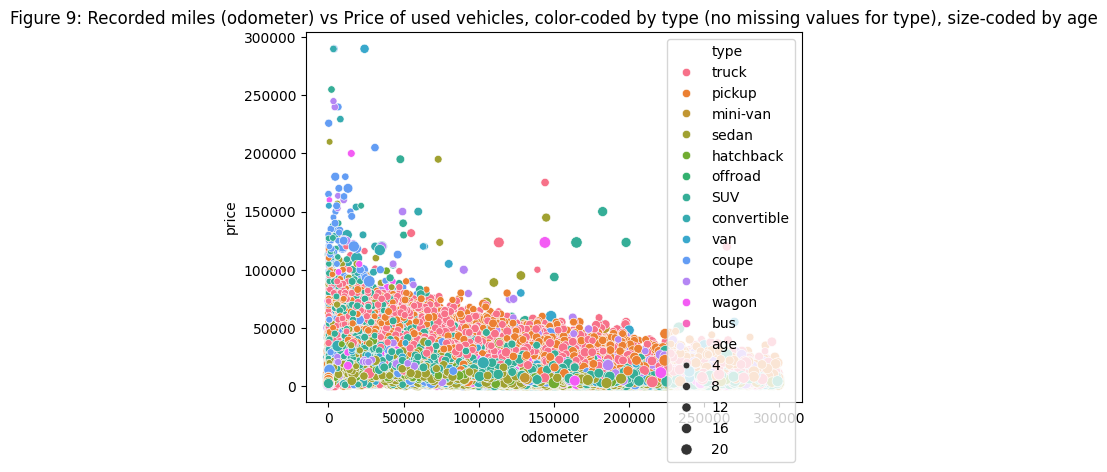

In [ ]:
#Visual vehicleswithtype

sns.scatterplot(x='odometer', y='price', hue = 'type', size = 'age', data = vehicleswithtype).set(title = 'Figure 9: Recorded miles\
 (odometer) vs Price of used vehicles, color-coded by type (no missing values for type), size-coded by age')

In [ ]:
#Create auxiliary matrices with polynomial features

quanti_features = vehicleswithtype[['odometer', 'age']]
auxi_quant = poly3.fit_transform(quanti_features) #poly3 is the model that generates polynomial features degree 3 (no bias)
auxi_quant_df = pd.DataFrame(auxi_quant, columns = (poly3.get_feature_names_out()))

auxi_quant_df.head()

,odometer,age,odometer^2,odometer age,age^2,odometer^3,odometer^2 age,odometer age^2,age^3
0,128000.0,11.0,1.638400e+10,1408000.0,121.0,2.097152e+15,1.802240e+11,15488000.0,1331.0
1,43000.0,5.0,1.849000e+09,215000.0,25.0,7.950700e+13,9.245000e+09,1075000.0,125.0
2,88000.0,20.0,7.744000e+09,1760000.0,400.0,6.814720e+14,1.548800e+11,35200000.0,8000.0
3,95000.0,12.0,9.025000e+09,1140000.0,144.0,8.573750e+14,1.083000e+11,13680000.0,1728.0
4,144700.0,23.0,2.093809e+10,3328100.0,529.0,3.029742e+15,4.815761e+11,76546300.0,12167.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

X1=vehicleswithtype[['lux', 'type']]
lny1=vehicleswithtype['ln_price']

encoder = OneHotEncoder( sparse_output = False, handle_unknown = 'ignore')
encoded_features1 = encoder.fit_transform(X1[['lux', 'type']])
encoded_df1 = pd.DataFrame(encoded_features1, columns=encoder.get_feature_names_out(['lux', 'type']))

X1 = pd.concat([X1.reset_index(drop=True), encoded_df1.reset_index(drop=True)], axis=1)

#Drop original 'lux' and 'type'
X1 = X1.drop(columns=['lux', 'type'])

X1.head()

,lux_affordableluxury,lux_harley motorcycle,lux_luxury,lux_nonluxury,lux_ultraluxury,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
print('categorical shape ', X1.shape)
print('quant shape ', auxi_quant_df.shape)

categorical shape  (140011, 18)
quant shape  (140011, 9)


In [ ]:
#Concatenate data frames so that all polynomial features and all dummy variables are included

superX = pd.concat([auxi_quant_df, X1], axis = 1)
superX.head()

,odometer,age,odometer^2,odometer age,age^2,odometer^3,odometer^2 age,odometer age^2,age^3,lux_affordableluxury,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,128000.0,11.0,1.638400e+10,1408000.0,121.0,2.097152e+15,1.802240e+11,15488000.0,1331.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,43000.0,5.0,1.849000e+09,215000.0,25.0,7.950700e+13,9.245000e+09,1075000.0,125.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,88000.0,20.0,7.744000e+09,1760000.0,400.0,6.814720e+14,1.548800e+11,35200000.0,8000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,95000.0,12.0,9.025000e+09,1140000.0,144.0,8.573750e+14,1.083000e+11,13680000.0,1728.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,144700.0,23.0,2.093809e+10,3328100.0,529.0,3.029742e+15,4.815761e+11,76546300.0,12167.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
superX.shape

(140011, 27)

In [ ]:
#split into training and test sets

superX_train, superX_test, lny1_train, lny1_test = train_test_split(superX, lny1, test_size=0.3, random_state=42)

**Model 6 Multiple linear regression on polynomial features degree 3 for odometer and age, plus dummy variables for categorical features lux and type (no scaling of features)**

In [ ]:
#Linear model on superX as explanatory features
#Instantiate, fit, and predict:
model_6 = LinearRegression()
model_6.fit(superX_train, lny1_train)
y_pred_6 = model_6.predict(superX_test)

# Evaluate the model
mse_6 = mean_squared_error(lny1_test, y_pred_6)
print(f"Mean Squared Error: {mse_6}")
print("train MSE: ", mean_squared_error(lny1_train, model_6.predict(superX_train)))


results6_df = pd.DataFrame(zip(model_6.feature_names_in_, model_6.coef_))
print(results6_df)
print(" ")
print("intercept: ", model_6.intercept_)

r_squared_6 = model_6.score(superX_test, lny1_test)
adjusted_r_squared_6 = 1 - (1-r_squared_6)*(len(lny1_test)-1)/(len(lny1_test)-superX_test.shape[1]-1)

print("R-squared: ",r_squared_6)
print("Adjusted R-squared: ", adjusted_r_squared_6)


Mean Squared Error: 0.30484658101545253
train MSE:  0.3013740025114926
                        0             1
0                odometer -2.611393e-06
1                     age -9.077985e-04
2              odometer^2 -2.814822e-11
3            odometer age  3.004968e-07
4                   age^2 -1.042324e-02
5              odometer^3  1.715319e-16
6          odometer^2 age -1.863405e-12
7          odometer age^2 -4.888137e-10
8                   age^3  3.246604e-04
9    lux_affordableluxury  8.100445e-08
10  lux_harley motorcycle -7.988493e-07
11             lux_luxury -9.328560e-06
12          lux_nonluxury  1.043651e-05
13        lux_ultraluxury -3.901020e-07
14               type_SUV  2.636534e-05
15               type_bus -7.726717e-08
16       type_convertible -1.873611e-06
17             type_coupe -1.292724e-05
18         type_hatchback -1.952643e-06
19          type_mini-van -3.036481e-07
20           type_offroad -3.923288e-07
21             type_other  2.393673e-07
22       

We will now compare the model above with a more parsimonious one that makes use of odometer and age only in linear fashion (degree 1), but also includes dummy variables for the categorical features lux and type.

In [ ]:
#Create equivalent matrix with features that include only linear terms (degree 1) for odometer and age, plus dummy variables for lux and type
superXlinear = pd.concat([quanti_features, X1.set_index(quanti_features.index)], axis = 1)
superXlinear.head()

,odometer,age,lux_affordableluxury,lux_harley motorcycle,lux_luxury,lux_nonluxury,lux_ultraluxury,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
31,128000.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34,43000.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
55,88000.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59,95000.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,144700.0,23.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
superXlinear.shape

(140011, 20)

In [ ]:
#split into training and test sets

superXlinear_train, superXlinear_test, lny1_train, lny1_test = train_test_split(superXlinear, lny1, test_size=0.3, random_state=42)

**Model 7 Multiple linear regression on odometer, age, and dummy variables for lux and type (no scaling of features)**

In [ ]:
#Run linear model with superXlinear (keep odometer and age degree 1)

#Instantiate, fit, and predict:
model_7 = LinearRegression()
model_7.fit(superXlinear_train, lny1_train)
y_pred_7 = model_7.predict(superXlinear_test)

# Evaluate the model
mse_7 = mean_squared_error(lny1_test, y_pred_7)
mse_7_train = mean_squared_error(lny1_train, model_7.predict(superXlinear_train))
print(f"Mean Squared Error: {mse_7}")
print("train MSE: ", mse_7_train)


# Print the coefficients and intercept
print(f"Coefficients: {model_7.coef_}")
print(f"Intercept: {model_7.intercept_}")

results7_df = pd.DataFrame(zip(model_7.feature_names_in_, model_7.coef_))
print(results7_df)
print(" ")
print("intercept: ", model_7.intercept_)

r_squared_7 = model_7.score(superXlinear_test, lny1_test)
adjusted_r_squared_7 = 1 - (1-r_squared_7)*(len(lny1_test)-1)/(len(lny1_test)-superXlinear_test.shape[1]-1)

print("R-squared: ",r_squared_7)
print("Adjusted R-squared: ", adjusted_r_squared_7)


Mean Squared Error: 0.19849632784385027
train MSE:  0.19572430041532715
Coefficients: [-3.47566501e-06 -8.57016868e-02 -1.90621256e-01 -4.78727952e-01
 -1.24266875e-01 -4.56045896e-01  1.24966198e+00 -1.11616078e-01
  3.16091891e-01  9.27983717e-02 -9.80649405e-02 -5.04173053e-01
 -3.24647075e-01  4.57244105e-01 -1.72323494e-02  4.69432546e-01
 -4.57049360e-01  4.95536223e-01 -4.52414579e-02 -2.73078823e-01]
Intercept: 11.319157566340643
                        0         1
0                odometer -0.000003
1                     age -0.085702
2    lux_affordableluxury -0.190621
3   lux_harley motorcycle -0.478728
4              lux_luxury -0.124267
5           lux_nonluxury -0.456046
6         lux_ultraluxury  1.249662
7                type_SUV -0.111616
8                type_bus  0.316092
9        type_convertible  0.092798
10             type_coupe -0.098065
11         type_hatchback -0.504173
12          type_mini-van -0.324647
13           type_offroad  0.457244
14             typ

This model above (model 7) seems to outperform all others: it produces the lowest MSE of all the models tested **(test MSE =0.198496, train MSE = 0.195724)**, and the largest adjusted $R^2 \approx 0.6893$.

##Ridge and LASSO  Regression with superXlinear (since this was the best model so far)

We will explore variations of model 7 that involve the complexity-control hyperparameter $\alpha$.


**Model 8: Ridge regression on odometer, age, and dummy variables for lux and type using 5-fold GridSearchCV for $\alpha$**

In [ ]:
#MODEL 8
#Ridge Regression GridSearchCV for alpha; using superXlinear as features
from sklearn.model_selection import GridSearchCV

ridgemodel_linear_gridsearch = Pipeline([
    ('MLR', Ridge())
])

parameters_to_try = {'MLR__alpha': 10**np.linspace(-5,4,100)}

ridge_model_finder = GridSearchCV(estimator = ridgemodel_linear_gridsearch, param_grid = parameters_to_try,
                            scoring = 'neg_mean_squared_error',cv = 5)
ridge_model_finder.fit(superXlinear_train, lny1_train)
ridge_model_finder.best_estimator_

feature_names = superXlinear_train.columns
ridgeresults_df = pd.DataFrame(zip(feature_names, ridge_model_finder.best_estimator_.named_steps["MLR"].coef_))

print(ridgeresults_df)
print(" ")
print("intercept: ", ridge_model_finder.best_estimator_.named_steps["MLR"].intercept_)


                        0         1
0                odometer -0.000003
1                     age -0.085700
2    lux_affordableluxury -0.185998
3   lux_harley motorcycle -0.466026
4              lux_luxury -0.119664
5           lux_nonluxury -0.451423
6         lux_ultraluxury  1.223112
7                type_SUV -0.111389
8                type_bus  0.314549
9        type_convertible  0.093108
10             type_coupe -0.097750
11         type_hatchback -0.503895
12          type_mini-van -0.324342
13           type_offroad  0.456028
14             type_other -0.017021
15            type_pickup  0.469626
16             type_sedan -0.456815
17             type_truck  0.495722
18               type_van -0.045009
19             type_wagon -0.272811
 
intercept:  11.314312560542774


In [ ]:
ridge_model_finder.best_estimator_

Pipeline(steps=[('MLR', Ridge(alpha=0.5336699231206312))])

In [ ]:
ridge_model_finder.best_estimator_.named_steps["MLR"].alpha

0.5336699231206312

In [ ]:
#Evaluate the model
y_pred_ridgegrid_superXlinear = ridge_model_finder.predict(superXlinear_test) #I tried using .best_estimator_ for this but it resulted in TypeError: 'Pipeline' object is not callable.
mse_ridgegrid_superXlinear = mean_squared_error(lny1_test, y_pred_ridgegrid_superXlinear)
print(f"Mean Squared Error: {mse_ridgegrid_superXlinear}")
print("train MSE: ", mean_squared_error(lny1_train, ridge_model_finder.predict(superXlinear_train)))


Mean Squared Error: 0.19849890247095767
train MSE:  0.19572453569417245


**Model 9: LASSO regression on odometer, age, and dummy variables for lux and type using 5-fold GridSearchCV for $\alpha$**

In [ ]:
#MODEL 9
#LASSO regression GridSearchCV for alpha, using superXlinear as features

from sklearn.linear_model import Lasso

lassomodel_linear_gridsearch = Pipeline([
    ('MLR', Lasso())
])

parameters_to_try = {'MLR__alpha': 10**np.linspace(-5,4,100)}

lasso_model_finder = GridSearchCV(estimator = lassomodel_linear_gridsearch, param_grid = parameters_to_try,
                            scoring = 'neg_mean_squared_error',cv = 5)
lasso_model_finder.fit(superXlinear_train, lny1_train)
lasso_model_finder.best_estimator_

feature_names = superXlinear_train.columns
lassoresults_df = pd.DataFrame(zip(feature_names, lasso_model_finder.best_estimator_.named_steps["MLR"].coef_))

print(lassoresults_df)
print(" ")
print("intercept: ", lasso_model_finder.best_estimator_.named_steps["MLR"].intercept_)


                        0         1
0                odometer -0.000003
1                     age -0.085699
2    lux_affordableluxury  0.186303
3   lux_harley motorcycle -0.069598
4              lux_luxury  0.252727
5           lux_nonluxury -0.078953
6         lux_ultraluxury  1.579980
7                type_SUV -0.045549
8                type_bus  0.371781
9        type_convertible  0.158500
10             type_coupe -0.031691
11         type_hatchback -0.437955
12          type_mini-van -0.258185
13           type_offroad  0.517461
14             type_other  0.048447
15            type_pickup  0.535316
16             type_sedan -0.390990
17             type_truck  0.561387
18               type_van  0.020368
19             type_wagon -0.206775
 
intercept:  10.876069755889265


In [ ]:
lasso_model_finder.best_estimator_
print('alpha = ', lasso_model_finder.best_estimator_.named_steps["MLR"].alpha)

alpha =  1e-05


In [ ]:
# Evaluate the model
y_pred_lassogrid_superXlinear = lasso_model_finder.predict(superXlinear_test) #I tried using .best_estimator_ for this but it resulted in TypeError: 'Pipeline' object is not callable.
mse_lassogrid_superXlinear = mean_squared_error(lny1_test, y_pred_lassogrid_superXlinear)
print(f"Mean Squared Error: {mse_lassogrid_superXlinear}")
print("train MSE: ", mean_squared_error(lny1_train, lasso_model_finder.predict(superXlinear_train)))


Mean Squared Error: 0.19850622049025637
train MSE:  0.19572527933843023


As final model, and as a baseline comparison, we also present a model that makes use of the two categorical variables lux and type only (through dummy variables).

**Model 10: Linear regression on dummy variables for lux and type vs ln(price)**

In [ ]:
# MODEL 10
## AS ADDITIONAL EXPERIMENT, MODEL THAT USES ONLY THE CATEGORICAL VARIABLES LUX AND TYPE TO PREDICT PRICE (THROUGH ONE HOT ENCODER)

from sklearn.preprocessing import OneHotEncoder

Xcat=vehicleswithtype[['lux', 'type']] #only use categorical variables lux and type
lny1=vehicleswithtype['ln_price']

encoder = OneHotEncoder( sparse_output = False, handle_unknown = 'ignore')
encoded_features1 = encoder.fit_transform(Xcat[['lux', 'type']])
encoded_df1 = pd.DataFrame(encoded_features1, columns=encoder.get_feature_names_out(['lux', 'type']))

Xcat = pd.concat([Xcat.reset_index(drop=True), encoded_df1.reset_index(drop=True)], axis=1)

#Drop original 'lux' and 'type'
Xcat = Xcat.drop(columns=['lux', 'type'])

Xcat_train, Xcat_test, lny1_train, lny1_test = train_test_split(Xcat, lny1, test_size=0.3, random_state=42)

#Instantiate, fit, and predict:
model_typelux = LinearRegression()
model_typelux.fit(Xcat_train, lny1_train)
y_pred_typelux = model_typelux.predict(Xcat_test)

# Evaluate the model
mse_typelux = mean_squared_error(lny1_test, y_pred_typelux)
print(f"Mean Squared Error: {mse_typelux}")
print("train MSE: ", mean_squared_error(lny1_train, model_typelux.predict(Xcat_train)))

# Print the coefficients and intercept
pd.DataFrame({"Feature": Xcat_train.columns.tolist(), "Coefficients": model_typelux.coef_})


print(pd.DataFrame({"Feature": Xcat_train.columns.tolist(), "Coefficients": model_typelux.coef_}))
print(f"Intercept: {model_typelux.intercept_}")

r_squared_typelux = model_typelux.score(Xcat_test, lny1_test)
adjusted_r_squared_typelux = 1 - (1-r_squared_typelux)*(len(lny1_test)-1)/(len(lny1_test)-Xcat_test.shape[1]-1)

print("R-squared: ",r_squared_typelux)
print("Adjusted R-squared: ",adjusted_r_squared_typelux)

Mean Squared Error: 0.5292349371745373
train MSE:  0.5251562692887402
                  Feature  Coefficients
0    lux_affordableluxury -1.352714e+11
1   lux_harley motorcycle -1.352714e+11
2              lux_luxury -1.352714e+11
3           lux_nonluxury -1.352714e+11
4         lux_ultraluxury -1.352714e+11
5                type_SUV  3.174061e+12
6                type_bus  3.174061e+12
7        type_convertible  3.174061e+12
8              type_coupe  3.174061e+12
9          type_hatchback  3.174061e+12
10          type_mini-van  3.174061e+12
11           type_offroad  3.174061e+12
12             type_other  3.174061e+12
13            type_pickup  3.174061e+12
14             type_sedan  3.174061e+12
15             type_truck  3.174061e+12
16               type_van  3.174061e+12
17             type_wagon  3.174061e+12
Intercept: -3038789225437.417
R-squared:  0.17194353083074998
Adjusted R-squared:  0.17158852269820146


This is obviously not a sound model, not only because the resulting metrics are inferior to most other models (higher MSE values, lower adjusted $R^2$), but also because, conceptually, it is making use of only two categorical features (luxury level of the vehicle's manufacturer and type of vehicle)to attempt to predict the vehicle's price.  It has been run and fitted simply for comparison purposes/as some sort of baseline.

## Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Throughout this modeling section we have illustrated the use of both simple cross validation, wherein a proportion of the available data is reserved for testing purposes (30\% was chosen, a pretty conventional value for this purpose) --this was applied in all but the last model, which actually made use of k-fold crosss-validation (with k = 5).

In all cases, the metric reported for each model is the mean-squared-error (MSE). This is a standard measure that allows for comparison across the models: a lower MSE is understood to signal a better fit to the data, as it corresponds to a smaller (squared) distance between predicted and observed values of the response feature (in this case, the natural logarithm of the price).



**Comparison table for explored models**



|Model   |Description   |Test MSE   |Train MSE   |adjusted $R^2$ (where applicable/available)   |
|---|---|---|---|---|
|1a   |SLR age vs ln(price) |0.35086031   |0.35020806   |0.4773   |
|1aa   |SLR odometer vs ln(price) |0.441601383   |0.443515457   |0.3422   |
|1b   |MLR age, odometer vs ln(price)   |0.329861586   |0.329608607   |0.50860292   |
|2b   |Polynomial deg2, age & odometer vs ln(price)   |0.325806238   |0.325684947   |0.514617857   |
|2c   |Polynomial deg3, age & odometer vs ln(price)   |0.323178431   |0.322659755   |0.5184978820   |
|3c   |MLR age, odometer, OHE(lux) vs ln(price)   |0.326462444   |0.325835949   |0.51362264811   |
|4a   |Ridge regression (RR) pipeline: poly deg 3, std scaling, RR $\alpha=1$   |0.322903374   |0.322280778   |   |
|4b   |RR pipeline: poly deg 3, std scaling w/GridSearchCV 5-fold for $\alpha$  |0.322900112   |0.322281515   | $\alpha = 3.511197$  |
|5a   |LASSO pipeline: poly deg 3, std scaling, $\alpha = 1$   |0.671301733   |0.671113746   |   |
|5b   |LASSO pipeline: poly deg 3, std scaling, GridSearchCv 5-fold for $\alpha$   |0.323034676   |0.322336607   | $\alpha = 0.00001$  |
|6   |MLR Polynomial deg 3 (odometer & age), OHE lux & type vs ln(price) |0.304846581   |0.301374003   |0.52272131   |
|7   |MLR linear terms odometer & age, OHE lux & type vs ln(price) |0.19849632   |0.1957243004   |0.68927888   |
|8   |RR GridSearchCv for alpha; linear terms odometer & age, OHE lux & type vs ln(price) | 0.1984989025  |0.1957245357  |$\alpha = 0.5336699$   |
|9   |LASSO GridSearchCv for alpha; linear terms odometer & age, OHE lux & type vs ln(price) |0.1985062205   |0.1957252793   |$\alpha = 0.00001$   |
|10   |Linear regression w/OHE for lux and type vs ln(price) |0.5292349372   |0.5215562693   |0.171588   |



####**Discussion**

Among the first set of models (1a through 3c), which involve different combinations of the quantitative features odometer and age and the categorical feature lux , and do not involve the penalty hyperparameter $\alpha$, the best model seems to be model 2c, which is a polynomial regression of degree 3, using the features 'odometer' and 'age' to predict the natural logarithm of the vehicle's price.  


The second set of models (4a through 5b) do involve the hyperparameter $\alpha$, which acts as complexity control. These are all coded with a Pipeline that includes polynomial features degree 3 (following on the discovery from the first set of models), plus standard scaling of the explanatory features, and the corresponding regression model (ridge or LASSO). Among these, the one that produced the lowest MSE for the test set was the ridge regression using GridSearchCV (model 4b) to optimize the value of $\alpha$ (which turned out to be $\alpha \approx$ 3.51), though the ridge regression with an input value of $\alpha =1$ (model 4a) did not come too far behind.   


The next set of models (6 through 9) was born out of the observation and intuition that not only the luxury level really ought to make an impact in the price, but also the type of vehicle. Thus, the set was further reduced to make sure no missing values were present. These models involve once again the quantitative features odometer and age, plus the categorical features lux and type (coded through dummy variables). It is important to mention that no scaling of the features was used for this set of tests, as the intention was to be able to find an interpretable model. While the set used for these models was reduced from the one used in the previous ones, it is somewhat reassuring to see that model 6, which uses degree 3 polynomial features for odometer and age, plus the dummy variables corresponding to lux and type, results in MSE values that are slightly lower, but comparable to the values produced by the penalized models in the second set. What is remarkable now is that taking this model 6 as starting point, and realizing that the polynomial features don't necessarily make sense, plus they may be creating some level of overfitting, the next three models (models 7, 8, and 9), it turns out that models that make use of odometer and age in a simple, linear fashion, but also incorporate the categorical features lux and type through dummy variables.

These 3 models produce MSE values that are pretty close (so it seems like the penalization estimated as optimal by the ridge regression of model 8, which produced an $\alpha$ value of 0.53367 and that estimated by the LASSO regression of model 9 with an estimated $\alpha$ very close to zero, 0.00001 do not have a huge effect on the resulting model). Hence, we can confidently take model 7, which produced the lowest MSE values as the best model in the whole set. Indeed, the MSE values it produced constitute a huge improvement over all the initial models 1a through 5b (as shown in the table above). Furthermore, the value of the adjusted $R^2$ can be calculated for this model, resulting in 0.6893, vastly superior to every other model in the set.

\* The very last model, labeled model 10, was never expected to perform well (it does not). It was included simply as a means to visualize what a baseline would look like in a model that made use of the categorical features lux and type only to predict the price of used vehicles. Clearly, the information provided by these features is insufficient to inform the model.

**TLDR:** The optimal model among the ones developed and tested is the following (model 7):

$\ln(\textrm{price}) = 11.3191575663 -0.000003\times$odometer $-0.085702\times$age $-0.190621\times$lux_affordableluxury $-0.478728\times$lux_harley motorcycle $-0.124267\times$ lux_luxury $-0.456046\times$lux_nonluxury $+1.249662\times$lux_ultraluxury $-0.111616\times$type_SUV $+0.316092\times$type_bus $+0.092798\times$type_convertible $-0.098065\times$type_coupe $-0.504173\times$type_hatchback $-0.324647\times$type_mini-van $+0.457244\times$type_offroad $-0.017232\times$type_other $+0.469433\times$type_pickup $-0.457049\times$type_sedan $+0
495536\times$type_truck $-0.045241\times$type_van $-0.273079\times$type_wagon.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Let's look again at the model found to be the best one to predict the price of used vehicles:

In [ ]:
print(f"Mean Squared Error: {mse_7}")
print("train MSE: ", mse_7_train)


# Print the coefficients and intercept
print(f"Coefficients: {model_7.coef_}")
print(f"Intercept: {model_7.intercept_}")

results7_df = pd.DataFrame(zip(model_7.feature_names_in_, model_7.coef_))
print(results7_df)
print(" ")
print("intercept: ", model_7.intercept_)

r_squared_7 = model_7.score(superXlinear_test, lny1_test)
adjusted_r_squared_7 = 1 - (1-r_squared_7)*(len(lny1_test)-1)/(len(lny1_test)-superXlinear_test.shape[1]-1)

print("R-squared: ",r_squared_7)
print("Adjusted R-squared: ", adjusted_r_squared_7)


Mean Squared Error: 0.19849632784385027
train MSE:  0.19572430041532715
Coefficients: [-3.47566501e-06 -8.57016868e-02 -1.90621256e-01 -4.78727952e-01
 -1.24266875e-01 -4.56045896e-01  1.24966198e+00 -1.11616078e-01
  3.16091891e-01  9.27983717e-02 -9.80649405e-02 -5.04173053e-01
 -3.24647075e-01  4.57244105e-01 -1.72323494e-02  4.69432546e-01
 -4.57049360e-01  4.95536223e-01 -4.52414579e-02 -2.73078823e-01]
Intercept: 11.319157566340643
                        0         1
0                odometer -0.000003
1                     age -0.085702
2    lux_affordableluxury -0.190621
3   lux_harley motorcycle -0.478728
4              lux_luxury -0.124267
5           lux_nonluxury -0.456046
6         lux_ultraluxury  1.249662
7                type_SUV -0.111616
8                type_bus  0.316092
9        type_convertible  0.092798
10             type_coupe -0.098065
11         type_hatchback -0.504173
12          type_mini-van -0.324647
13           type_offroad  0.457244
14             typ

This model predicts the following prices for different combinations of characteristics:

In [ ]:
#Some predictions for this model
import math
print ("price for new Harley-Davidson: $", round(math.exp(model_7.predict([[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])),2))
print ("price for new nonluxury sedan car: $", round(math.exp(model_7.predict([[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0]])),2))
print ("price for new ultraluxury sedan car: $", round(math.exp(model_7.predict([[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0]])),2))
print ("price for 12-yo nonluxury sedan car with 101,000 miles in odometer: $", \
       round(math.exp(model_7.predict([[101000,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0]])),2))

price for new Harley-Davidson: $ 51043.3
price for new nonluxury sedan car: $ 33059.44
price for new ultraluxury sedan car: $ 182001.5
price for 12-yo nonluxury sedan car with 101,000 miles in odometer: $ 8321.52


##**Findings**
As presented in the previous section, the optimal model is given by

$\ln(\textrm{price}) = 11.3191575663 -0.000003\times$odometer $-0.085702\times$age $-0.190621\times$lux_affordableluxury $-0.478728\times$lux_harley motorcycle $-0.124267\times$ lux_luxury $-0.456046\times$lux_nonluxury $+1.249662\times$lux_ultraluxury $-0.111616\times$type_SUV $+0.316092\times$type_bus $+0.092798\times$type_convertible $-0.098065\times$type_coupe $-0.504173\times$type_hatchback $-0.324647\times$type_mini-van $+0.457244\times$type_offroad $-0.017232\times$type_other $+0.469433\times$type_pickup $-0.457049\times$type_sedan $+0
495536\times$type_truck $-0.045241\times$type_van $-0.273079\times$type_wagon.



In this equation, the features 'odometer' and 'age' are quantitative (so the actual values enter into the equation above), and the rest of the terms involve so-called dummy variables for the categorical features lux and type -- this means that they only take on the value of one for those variables that match the specific luxury level and type of the specific vehicle under consideration (and they are zero for all the rest).


Reordering the features and fitted coefficients from largest to smallest, we can observe the isolated effects of each of them:

|Feature   |Coefficient $\beta_i$  |Rescaled factor $e^{\beta_i}$   |
|---|---|---|
|intercept   | 11.3192  |82384.90   |
|lux_ultraluxury   |  1.24966 |3.48916     |
|type_truck   | 0.49554  |1.64138   |  
|type_pickup   | 0.46943  |1.59909     |
|type_offroad   |0.45724   |1.57971     |
|type_bus   |0.31609   |1.37176     |
|type_convertible   |0.0928   |1.09724   |  
|odometer   |-0.000003   |0.999997 |  
|type_other   |-0.01723   |0.98292     |
|type_van   |-0.04524   | 0.95577    |
|age   |-0.0857   | 0.91787  |  
|type_coupe|-0.09807   |0.90659   |   |  
|type_SUV|-0.11162   |0.89439   |   |  
|lux_luxury| -0.12427  | 0.88314  |     |
|lux_affordableluxury|-0.19062   |0.82645   |   |  
|type_wagon| -0.27308  | 0.76103  |   |  
|type_mini-van| -0.32465  |0.72278   |     |
|lux_nonluxury| -0.45605  |0.63378    |   |
|type_sedan| -0.45705  | 0.63315    |   |
|lux_harley motorcycle| -0.47873  |0.61957   |   |  
|type_hatchback| -0.50417  |0.604   |   |  


Since each vehicle will have a combination of one luxury level and one type of vehicle, the overall effect will depend on the sign of the sum of the estimated coefficients:

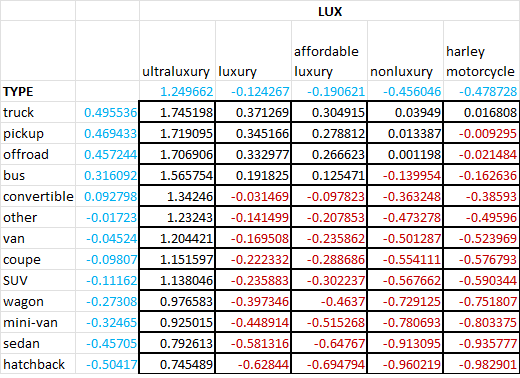

All the combinations of lux and type features that produce a positive sum of the coefficients in the fitted model result in a factor greater than one --meaning, the predicted price is higher than the baseline of $e^{11.3192+0.000003\times\textrm{odometer}-0.0857\times\textrm{age}}$. Conversely, combinations of features with a negative sum of coefficients result in a cut on the selling price of the vehicle.

Once the sums shown above are plugged into an exponential function to revert the logarithmic transformation applied to the prices, the resulting factors are given by:

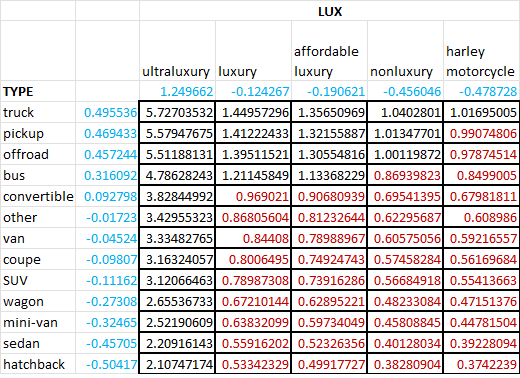




##Actionable Items: vehicles to keep in inventory, vehicles to avoid

The model itself, combined with the table above allow us to interpret the results in terms of the characteristics that make a vehicle more or less desirable, as reflected by the price at which it sells.

**Keepers:**
* Vehicles that are newer in age and with a lower mileage as recorded by the odometer are always preferred over older vehicles.
*By far, vehicles in the ultraluxury category are preferred over vehicles in any other lux category. In fact, any type of vehicle from manufacturers in the ultraluxury category, from trucks to hatchbacks are associated with a factor greater than one for price prediction.
* Trucks, pickups, offroad vehicles and buses from manufacturers in the luxury and affordable luxury categories are also good assets, as they, too, have a factor greater than one for their price predictions in this model.
* Trucks, pickups and offroad vehicles in general, even in the nonluxury category, are good elements in dealers' inventory, as they also have a factor greater than one in the calculation of the price predictions.

**Avoid:**
* At the opposite end of the spectrum: hatchbacks, sedans, minivans,  wagons and even SUVs tend to associate with lower prices, as suggested by the factors that are all less than one in the table.
* Coupes, vans and convertibles, not surprisingly, are better if they are from luxury manufacturers than if they are not; the same is true for convertibles.

**A note about Harleys:**

* In hindsight, while "Harley-Davidson" was detected as a label in the manufacturer feature and not in type, it would have been better to code these samples as "motorcycle" type, overriding whatever entry was present in the set. This would have made the results of the analysis more sensible -- it is hard to give credence to statements that associate "harley motorcycle" with types such as truck, bus, etc. For the purposes of this set of takeaways, suffice it to focus on the fact that Harley-Davidson is considered a luxury brand of motorcycles, so presumably having them in a used car dealership would be desirable. Furthermore, it may even be a good idea to propose and fit a separate model for motorcycle prices.


##Potential extensions/Next Steps

This initial exploration involved features in the data set that seemed related to the price of used vehicles in an obvious way: the vehicle's age and the number of miles recorded in the odometer, plus the type of vehicle and the luxury level associated with its manufacturer. We explored a total of 15 models that combine these features in different ways, and found one in particular that not only optimizes the metric used --lowest MSE--, but also can be considered parsimonious, as it involves only linear terms of the quantitative features odometer and age, in addition to involving the categorical features lux and type through dummy variables. This also gives the resulting model a level of interpretability that would not be possible for some of the alternative models explored.

Some features not included in this project could potentially be interesting in terms of how they may affect used vehicles' prices. Future refinements of the model might look at features such as the condition of the vehicle, its size and/or the number of cylinders. Furthermore, a differentiated analysis by region or state may reveal whether geographical location plays a role in the determination of used vehicles' prices.

###Harley-Davidson: a word on some limitations of the analysis

As suggested earlier, at the conclusion of the analysis it became apparent that it would have been advisable to separate the samples (rows) corresponding to Harley-Davidson motorcycles, as a separate model for these might be more reasonable. Indeed, it does not make sense to think of Harleys as fitting any of the "type" labels in the set (truck, pickup, etc.). In the data set itself, it is unclear how the type for these samples was entered, though it was fairly clear that the quality of the data was not ideal. In this sense, it may be useful to remember the old adage applied to data: "garbage in, garbage out".
